Women's E-Commerce Clothing Reviews

1. Import Libraries and Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('C:/Users/Hp/Downloads/Clothes.csv')

In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


2. Data Cleaning

In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
# Fill or drop missing values
df['Title'].fillna('No Title', inplace=True)
df['Review Text'].fillna('No Review', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14332\315832850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].fillna('No Title', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14332\315832850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Create a feature for review length
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()))

# Create a sentiment feature based on ratings
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative') ggg

SyntaxError: invalid syntax (1118357212.py, line 5)

3. Exploratory Data Analysis (EDA)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10896\4065348911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='coolwarm')


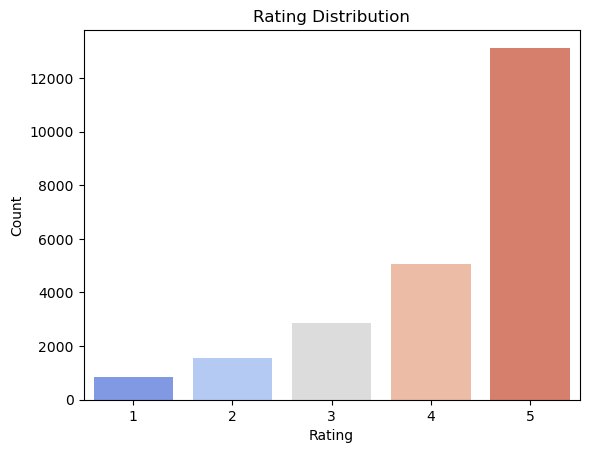

In [ ]:
#Rating Distribution
sns.countplot(data=df, x='Rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

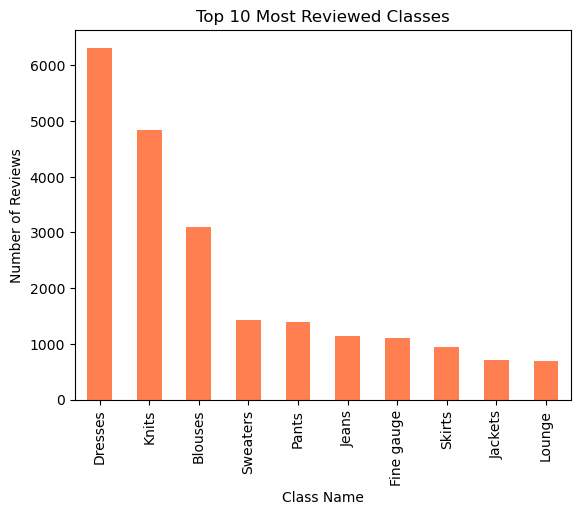

In [ ]:
#Top Classes and Departments
# Most reviewed classes
top_classes = df['Class Name'].value_counts().head(10)
top_classes.plot(kind='bar', color='coral')
plt.title('Top 10 Most Reviewed Classes')
plt.xlabel('Class Name')
plt.ylabel('Number of Reviews')
plt.show()


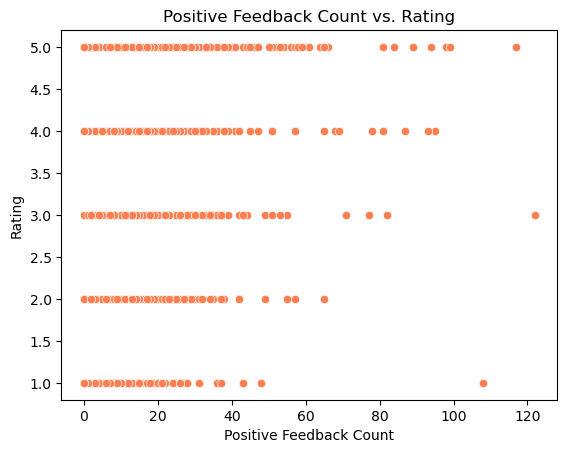

In [ ]:
#Positive Feedback Analysis
# Correlation between positive feedback count and rating
sns.scatterplot(data=df, x='Positive Feedback Count', y='Rating', color='coral')
plt.title('Positive Feedback Count vs. Rating')
plt.show()

4. Focus on Products with Low Ratings

In [ ]:
# Filter for Products with Low Ratings
low_rated = df[df['Rating'] <= 2]

# Group by clothing ID and analyze review insights
low_rating_summary = low_rated.groupby('Clothing ID').agg({
    'Rating': 'count', 
    'Positive Feedback Count': 'mean', 
    'Review Length': 'mean',
    'Review Text': lambda x: ' '.join(x)
}).reset_index()

low_rating_summary.rename(columns={'Rating': 'Low Rating Count'}, inplace=True)
print(low_rating_summary.head())


   Clothing ID  Low Rating Count  Positive Feedback Count  Review Length  \
0            1                 1                      1.0      28.000000   
1            8                 3                      0.0      74.333333   
2           11                 1                      0.0      51.000000   
3           15                 1                      0.0      16.000000   
4           18                 1                      0.0      60.000000   

                                         Review Text  
0  I love this tank, it is so comfortable but it ...  
1  This suit was high quality, and a cute design....  
2  The color says red but it's more like a rust. ...  
3  Way too long...the sizing is incredibly off on...  
4  I ordered these leggings and loved them, for a...  


In [ ]:
# Sentiment Insights
# Common issues in reviews
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
review_matrix = vectorizer.fit_transform(low_rated['Review Text'])
common_words = vectorizer.get_feature_names_out()

print("Most Common Words in Low Ratings:", common_words)

Most Common Words in Low Ratings: ['color' 'dress' 'fabric' 'fit' 'just' 'large' 'like' 'look' 'looked'
 'looks' 'love' 'material' 'ordered' 'quality' 'really' 'shirt' 'size'
 'small' 'way' 'wear']


5. Recommendations

In [ ]:
#Identify Enhancements for Low-Rated Products
# Flagging products with frequent low ratings
low_rating_summary['Needs Enhancement'] = np.where(
    low_rating_summary['Low Rating Count'] > 10, 'Yes', 'No'
)

# Display products needing enhancement
products_to_enhance = low_rating_summary[low_rating_summary['Needs Enhancement'] == 'Yes']
print(products_to_enhance[['Clothing ID', 'Low Rating Count', 'Needs Enhancement']])


     Clothing ID  Low Rating Count Needs Enhancement
144          818                12               Yes
146          820                26               Yes
149          823                15               Yes
151          825                13               Yes
154          828                16               Yes
..           ...               ...               ...
352         1095                43               Yes
355         1098                13               Yes
356         1099                12               Yes
361         1104                18               Yes
365         1110                39               Yes

[68 rows x 3 columns]


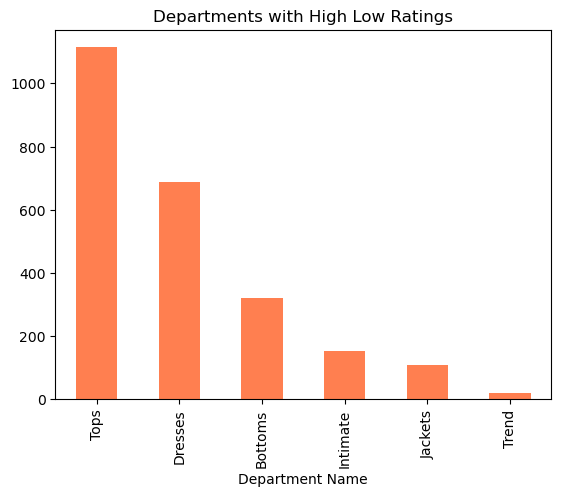

In [ ]:
#Department-Level Insights
# Departments with high low-rating counts
dept_low_ratings = low_rated.groupby('Department Name').size().sort_values(ascending=False)
dept_low_ratings.plot(kind='bar', color='coral')
plt.title('Departments with High Low Ratings')
plt.show()


6. Visualization of Recommendations

C:\Users\Hp\AppData\Local\Temp\ipykernel_10896\2643174029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=products_to_enhance, x='Clothing ID', y='Low Rating Count', palette='coolwarm')


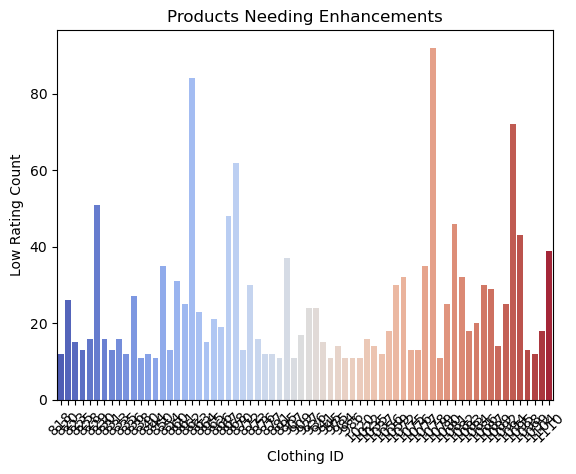

In [ ]:
# Plot clothing items requiring enhancements
sns.barplot(data=products_to_enhance, x='Clothing ID', y='Low Rating Count', palette='coolwarm')
plt.title('Products Needing Enhancements')
plt.xlabel('Clothing ID')
plt.ylabel('Low Rating Count')
plt.xticks(rotation=45)
plt.show()
